# Logistic regression: A deeper dive

## Overview

* How does logistic regression learn from data?
    * Minimising loss through gradient descent
* Evaluation logistic regression models
    * Precision, recall, F1 score

In this learning unit, we'll go into some of the more technical details of logistic regression.

We'll look at how the weights and biases (the parameters) of the model are learned from data, by minimising a loss function.

Additional evaluation metrics will be introduced, to give you a way to measure model performance.

Then we'll go through some practical examples using sklearn.

## Learning from data

Find $w$ and $b$ such that $p = \sigma(wx + b)$ fits best line

What is "best"?

Let's consider example from spam classification, using a single feature to predict if an email is spam (class = 1) or not spam (class = 0).

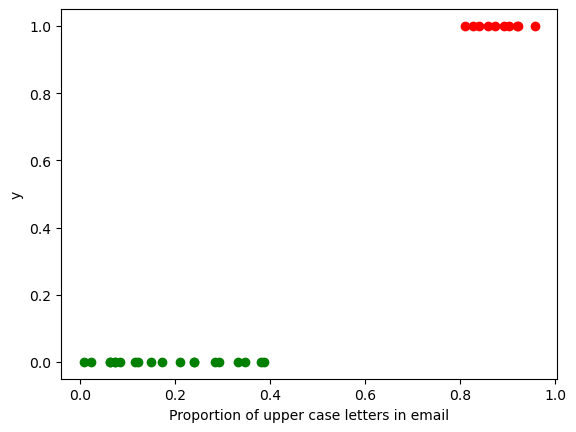

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x_not_spam = 0.4*np.random.uniform(size=20)
y_not_spam = np.zeros(20)
x_spam = 0.8+0.2*np.random.uniform(size=10)
y_spam = np.ones(10)

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.xlabel("Proportion of upper case letters in email")
plt.ylabel("y")
plt.show()

The goal of fitting a logistic regression model is to find the best line of the form $p = \sigma(wx + b)$.

Let's look at the residuals for a logistic regression model with $w=10$ and $b=-6$

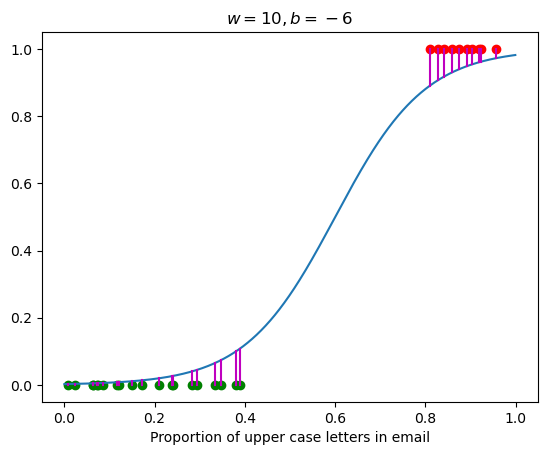

In [2]:
xplot = np.arange(0,1,0.001)
y = np.concatenate([y_spam, y_not_spam])
X = np.concatenate([x_spam, x_not_spam]).reshape([-1,1])

w = 10
b = -6

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.plot(xplot, sigmoid(w*xplot+b))
for yi, x in zip(y, X.reshape(-1)):
    plt.plot([x,x],[yi, sigmoid(w*x+b)], color='m')
    
plt.xlabel("Proportion of upper case letters in email")
plt.title(f'$w = {w}, b = {b}$')
plt.show()
    

plt.show()

The residuals are shown in pink. How could we reduce them further?

* Increase $w$ (keeping the ratio of $\frac{b}{w}$ the same)!

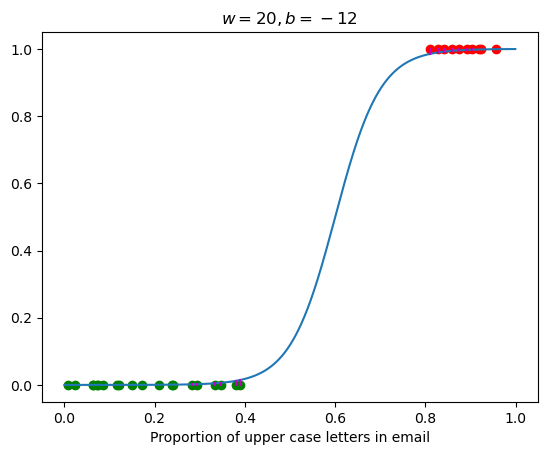

In [3]:
w = 20
b = -12

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.plot(xplot, sigmoid(w*xplot+b))
for yi, x in zip(y, X.reshape(-1)):
    plt.plot([x,x],[yi, sigmoid(w*x+b)], color='m')
    
plt.xlabel("Proportion of upper case letters in email")
plt.title(f'$w = {w}, b = {b}$')
plt.show()
    

plt.show()

In this example, our data is *linearly separable* - we could keep increasing $w$ further until our model resembles a step function:

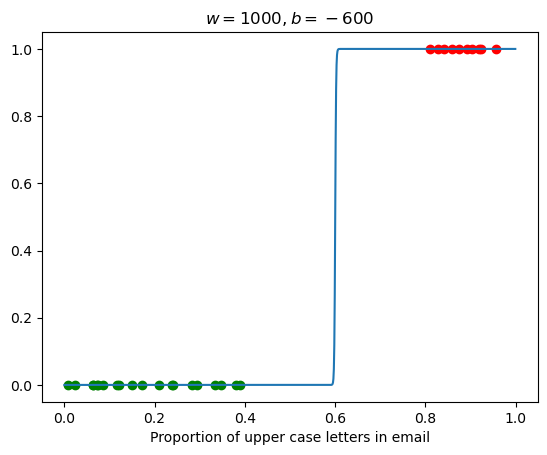

In [4]:
w = 1000
b = -600

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.plot(xplot, sigmoid(w*xplot+b))
for yi, x in zip(y, X.reshape(-1)):
    plt.plot([x,x],[yi, sigmoid(w*x+b)], color='m')
    
plt.xlabel("Proportion of upper case letters in email")
plt.title(f'$w = {w}, b = {b}$')
plt.show()
    

plt.show()

This minimises our residuals, but is it the best model?

## Maximum likelihood estimation

* Recall, in linear regression, we choose the parameters to minimise the sum of the square of the residuals (SSE)
* In logistic regression, we instead maximise the *likelihood* of our data, given our model
    * Known as maximum likelihood estimation (MLE)

## Likelihood (binary)

Remember, for the binary case, our model prediction $p_n$ is the probability that the corresponding ground truth label $y_n$ is equal to 1:

$$
p_n = P(y_n=1|x_n)
$$

We can therefore calculate *likelihood* $\ell_n$ for each observation $n \in N$ using the *sum rule*:
* i.e. how likely our ground-truth data is given our model

$$
\begin{aligned}
\ell_n &= P(y_n=1|x_n)(y_n=1) + P(y_n=0|x_n)(y_n=0) \\
&= p_n y_n + (1-p_n)(1-y_n)
\end{aligned}
$$

Note, this the following form is also equivalent (check you understand why!):

$$
\ell_n = {p_n}^{y_n} (1-p_n)^{(1-y_n)}
$$

If we assume each observation is *independent* we can then calculate the total likelihood $L$ of our data given our model by multiplying together these probabilities:

$$
\begin{aligned}
L &= \prod_{n=1}^N \ell_n \\
&= \prod_{n=1} p_n y_n + (1-p_n)(1-y_n)
\end{aligned}
$$

or the equivalent

$$
L = \prod_{n=1}^N {p_n}^{y_n} (1-p_n)^{(1-y_n)}
$$


We can then choose our parameters in order to maximise this likelihood!

## Computational issues

Calculating the total likelihood involves multiplying together lots of numbers between 0 and 1. 

This can cause computational issues, as $L$ tends to zero as $N$ increases:

$$\lim_{N \to \infty} L = 0$$

In practice, for large datasets, the total likelihood of the data is a very small number!

How can we avoid these computational issues?

## Logarithm to the rescue!

Recall the *addition rule* of logarithms:

$$
\log(a\times b) = \log{a} + \log{b}
$$

In other words, if we take the logarithms, we can use addition instead of multiplication!

## Log likelihood

We can therefore solve these issues by calculating the logarithm of the likelihood, known as the *log-likelihood*

$$
\begin{aligned}
L_{\text{log-likelihood}} &= \log{L} \\
&= \log\left( \prod_{n=1}^N {p_n}^{y_n} (1-p_n)^{(1-y_n)} \right) \\ 
&= \sum_{n=1}^N \left(\log(p_n)y_n + \log(1-p_n)(1-y_n) \right)\\
\end{aligned}
$$


As $p^n$ is between 0 and 1, $\log{p_n}$ is a negative number. As such, total log-likelihood is also a negative number, which tends to $-\infty$ as $N$ increases:

$$\lim_{N \to \infty} L_{\text{log-likelihood}} = -\infty$$

Maximising this value is equivalent to maximising our likelihood, i.e. choosing the model which maximises the total predicted probability of our data.

As it no longer tends to zero, we no longer have computational issues!

## Cross-entropy loss

In gradient descent our goal is to *minimise* a loss function. 

As such, it is more convenient to use the negative log-likelihood. It is also convenient to normalise the loss over the dataset size. This final loss function is known as *cross-entropy loss*, or $L_\text{CEL}$:

$$
\begin{aligned}
L_{\text{CEL}} &= -\frac{1}{N} L_{\text{log-likelihood}} \\
&= -\frac{1}{N} \sum_{n=1}^N \left(\log(p_n)y_n + \log(1-p_n)(1-y_n)\right)
\end{aligned}
$$


## Another way of thinking about it

That was quite a lot of maths! You may find it easier to instead consider the implications of taking the log directly.

* as $p$ decreases linearly, $\log(p)$ changes faster
    * Log of a correct prediction with probability 1.0 = 0.0
    * Log of a correct prediction with probability 0.75 = -0.29
    * Log of a correct prediction with probability 0.5 = -0.69
* It therefore penalises probabilities more as they move away from the expected value

Why not just use the probabilities directly, instead of taking the log?

The goal is to make sure that the worse the probability associated with a prediction (too low for a correct one, too high for a wrong one), the greater the penalty that is applied.

A linear penalty would mean that the probabilities of 0.8 and 0.9 would be just as different as 0.5 and 0.6, for a correct prediction.

Really, we want the penalties for 0.5/0.6 to to be higher AND the difference between 0.5 and 0.6 to be greater than 0.8 and 0.9.

Not taking the log would make the difference between both sets of prediction 0.1 : (0.6-0.5) and (0.9-0.8)

But log(0.6)-log(0.5) = 0.18 while log(0.9)-log(0.8) = 0.11 

The log of a prediction probability, when correct, equals zero. Otherwise, it is infinitely small.

The example here is for a prediction when the expected class is 1.

If the expected class is 0, then the calculation is just $1 - log(p)$.

## Building a loss function

To summarise:

- If an email is **spam** ($y=1$), the loss is:
$$-log(p)$$
- If an email is **not spam** ($y=0$), the loss is:
$$-log(1 - p)$$
- Note that the negation ensures that the loss is **positive** and **bounded by zero**

## Building a loss function

- These two cases be combined into the **cross-entropy loss**:

$$-log\left ( p^y(1-p)^{(1-y)} \right )$$

- Note when $y=0$, this simplifies to $-log(1-p)$ and when $y=1$, this simplifies to $-log(p)$

## Cross-entropy loss

- Sum over all data points to get total **cross-entropy loss**:
$$L = -\frac{1}{N}\sum_{i=1}^{N}log\left ( p_i^{y_i}(1-p_i)^{(1-{y_i})} \right )$$

The cross-entropy loss generates a single value which quantifies how well the model fits the data.

However, a good model should not overfit the data - there should be some room for generalising to new, unseen, data.

In the logistic model, we can adjust the loss function. First, let's look at why we need to do this.

## Logistic regression: assumptions

Logistic regression relies on  of the same issues/assumptions as linear regression:
 - Linear relationships between $x$ and $y$: whilst the sigmoid function is non-linear, the underlying regression model is still linear
 - Lack of multicolinearity: Parameter estimates are not stable with *colinear* features
 - Homoscedasticity: The logistic regression model also assumes the error terms have a [fixed distribution](https://en.wikipedia.org/wiki/Gumbel_distribution) with constance variance
 - Independence: The observations in the dataset are generated independently, such that there is no correlation between the error terms (i.i.d.)

As with linear regression, in practice we typically don't worry about these assumptions in machine learning applications, as we only care how well the model predicts the data.

## Logistic regression: issues

There is however a new issue we face with logistic regression that we need to overcome!

- as well as a familiar issue from linear regression - outliers

### Overconfidence
* The more easily separable the classes, the larger the weights get
* Large weights = extremely steep curve
* Steep curve = extremely sharp decision boundary

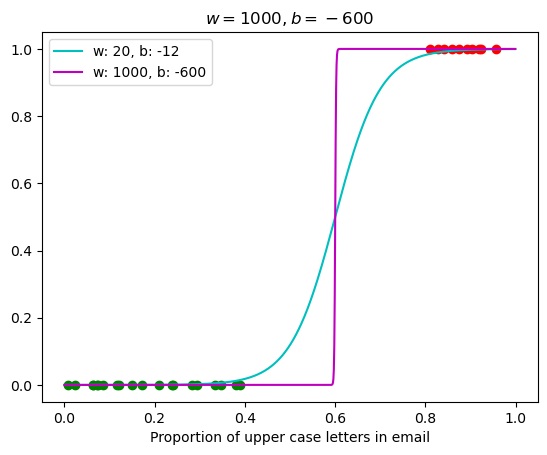

In [5]:
w1 = 20
b1 = -12

w2 = 1000
b2 = -600

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.plot(xplot, sigmoid(w1*xplot+b1), color='c', label=f'w: {w1}, b: {b1}')
plt.plot(xplot, sigmoid(w2*xplot+b2), color='m', label=f'w: {w2}, b: {b2}')
plt.legend()
    
plt.xlabel("Proportion of upper case letters in email")
plt.title(f'$w = {w}, b = {b}$')
plt.show()
    

plt.show()

A big problem with logistic regression: overconfidence. This creates an extreme cut-off point for classification.

If you have a univariate model, you could just apply the cut-off point manually in Excel - no need to study Python and machine learning!

In practice, the model with smaller parameters is probably a better fit to the data than the the one with higher parameters, despite it having a higher cross-entropy loss!

### Outliers

Outliers
* Extreme data points have a disproportionate effect on the model

Another is outliers, whether these are true outliers or errors in the data. A single extreme value can drastically alter the model and therefore the decision boundary and therefore the classification of other data points.

## Logistic regression: regularisation

* Regularise parameters:
    * Stabilises model, prevents overfitting
    * Results in less extreme parameter values and helps deal with outliers
* We follow the exact same procedure as with linear regression!
    * Add a regularisation term $\lambda {\left \| \mathbf{w} \right \|}_n$ to cross-entropy loss function

$$L = -\frac{1}{N}\sum_{i=1}^{N}log\left ( p_i^{y_i}(1-p_i)^{(1-{y_i})} \right ) + \lambda {\left \| \mathbf{w} \right \|}_n $$

These issues can be overcome by adjusting how model parameters are learned during training. This involves adding a regularisation term to the loss function we want to minimise.

## Logistic regression: regularisation

* $\lambda{L1}$ norm (lasso regularisation) adds **sum of absolute values** of params
* $\lambda{L2}$ norm (ridge regularisation) adds **sum of squares** of params
* Both encourage smaller parameters values
* $\lambda$ controls effect of the norm
* L2 most commonly used in logistic regression

This regularisation term is usually one of two norms. The effect is to restrict the magnitude of the parameters learned by the model.

The L1 norm adds on the sum of the absolute values of the parameters, while L2 adds on the sum of the squared parameters.

These norms especially penalise large parameter values.

The lambda hyperparameter further controls how much regularisation is applied.

L2 is most commonly used in logistic regression as it has convenient mathematical properties.

## Regularisation in sklearn

Regularisation strength in scikit-learn is controlled by the parameter $C$, which is the inverse of $\lambda$
* Small $C \rightarrow$ more regularisation 
* Large $C \rightarrow$ less regularisation 

Let's see the impact of regularisation on our fitted model with sklearn

C: 1 - w: 2.638, b: -1.906, loss: 0.319
C: 10 - w: 7.261, b: -4.386, loss: 0.087
C: 100 - w: 13.325, b: -7.916, loss: 0.017
C: 10000 - w: 28.632, b: -17.105, loss: 0.000


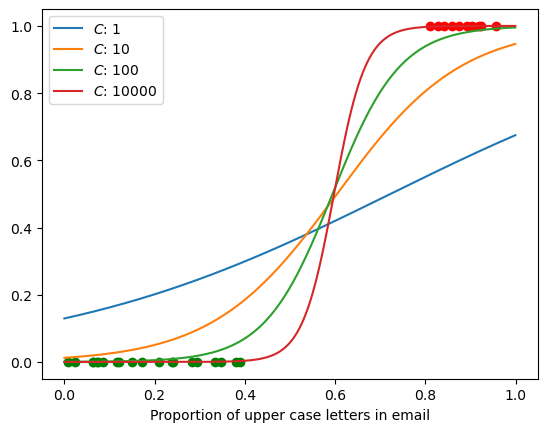

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
for C in [1,10,100,10000]:
    lr = LogisticRegression(C=C).fit(X, y)
    y_probs = lr.predict_proba(xplot.reshape(-1,1))[:,1]
    plt.plot(xplot, y_probs, label=f'$C$: {C}')
    print(f'C: {C} - w: {lr.coef_[0][0]:.3f}, b: {lr.intercept_[0]:.3f}, loss: {log_loss(y, lr.predict_proba(X)):.3f}')
plt.legend()
    
plt.xlabel("Proportion of upper case letters in email")
plt.show()
    

Here are four examples of the L2 norm on model parameters.

As $C$ increases, the decision boundary becomes more steep because the associated parameter gradually increases (less regularisation). The result is a sharper curve.

## Logistic regression: learning parameters

* Model: $p = \sigma(wx + b)$
* Want best values for $w$ and $b$
    * Should be regularised values
* No closed form solution for logistic regression

Putting everything together, we have a logistic model and want to learn the best parameters. These are the ones which do not massively overfit the data and do not cause the model to be extremely confident all the time.

Since we cannot simply solve the logistic regression formula in the same way as for linear regression, we need another approach.

## Logistic regression: learning parameters

* Model generates probabilities for feature vectors $x_n$ in $X$
* Inputs have true outputs $y_n$, equal to $0$ or $1$
* Error is a function of parameters $w$
$$L_\text{CEL}(w) = -\frac{1}{N}\sum_{n=1}^{N}log\left ( p_n^{y_n}(1-p_n)^{(1-{y_n})} \right ) + \lambda {\left \| \mathbf{w} \right \|}_2^2$$

Our loss function has some nice properties. It is smooth and differentiable, and is a function of our model's parameters.

We can use this to iteratively find the parameters that minimises the loss.

## Logistic regression: learning parameters


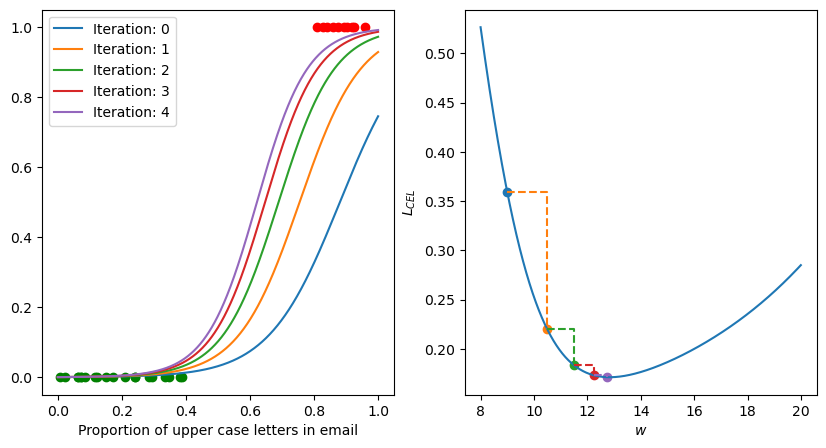

In [7]:
w_vals = np.arange(8,20,0.01)

def L2(w, b):
    return np.sqrt(w**2+b**2)

def cel(w, y, X, b=-7.916, C=100):
    N = len(y)
    y_prob = sigmoid(w*X+b).reshape(-1)
    ll = np.sum(np.log(y_prob*y+(1-y_prob)*(1-y)))
    return (-1/N)*ll+(1/C)*L2(w,b)

cel_vals = [cel(w, y, X) for w in w_vals]

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].scatter(x_not_spam, y_not_spam, color='g')
axs[0].scatter(x_spam, y_spam, color='r')
axs[1].plot(w_vals, cel_vals)
axs[0].set_xlabel("Proportion of upper case letters in email")
axs[1].set_xlabel('$w$')
axs[1].set_ylabel('$L_{CEL}$')
wvals = [9,10.5,11.5,12.25,12.75]
for i, wi in enumerate(wvals):
    axs[0].plot(xplot, sigmoid(wi*xplot-7.916), label=f'Iteration: {i}')
    axs[1].scatter(wi, cel(wi, y, X))
    if i<len(wvals)-1:
        axs[1].plot([wi,wvals[i+1],wvals[i+1]], [cel(wi, y, X), cel(wi, y, X), cel(wvals[i+1], y, X)], linestyle='--')
axs[0].legend()
plt.show()

This plot illustrates the parameter learning process through gradient descent, for a single parameter $w$. 

*__Note__: for this example, $b$ is fixed at the final value. Normally you would perform gradient descent on all parameter simultaneously*.

We choose an initial value for the perimeter (here 9), and we continue to step in the direction of the gradient until we reach a point where the gradient is zero.

## Multivariate logistic regression

It is trivial to extend univariate logistic regression to multivariate logistic regression, following the same approach as that used for linear regression

Single variable model: $$y = \sigma(w x + b)$$

Two variable model: $$y = \sigma(b + w_1 x_1 + w_2 x_2)$$

$J$ variable model: $$y = \sigma(b + \sum_{j=1}^J w_j x_j)$$

Recall that the univariate logistic regression model multiplies the value of a single input value by some weight, then adds a bias.

If you have multiple variables, the model simply needs to learn one weight for each input feature.

## Matrix notation

* As number of features increases, notation becomes bulky
* Linear equations can be represented with matrix notation

So far we have looked only at the case where there is a single input feature/variable. This is easy to visualise through scatterplots/lineplots and the maths is easy to write out in full, up to two input features.

A new approach is needed as we move to using more input features, because the notation becomes very lengthy.

Let's look at a shorthand for representing multivariate logistic regression models.

## Matrix multiplication

We can simplify the equations using Matrix notation:

$$X = \underset{\small (n,J+1)}{\begin{bmatrix}
        1 & x_{1,1} & \dots & x_{1,J} \\
        1 & x_{2,1} & \dots & x_{2,J} \\
        \vdots & \vdots & \ddots & \vdots
        \\ 1 & x_{n,1} & \dots & x_{n,J}
\end{bmatrix}} \quad \quad \mathbf{\beta} = \underset{\small (J+1,)} {\begin{bmatrix} \beta_0 & \beta_1 & \dots & \beta_J \end{bmatrix}}$$

$$\hat{y} = \sigma(X \mathbf{\beta})$$

where 

$\beta_0$ is the intercept, and $\beta_j$ is the corresponding weight for feature $j$.


Suppose we still want to classify emails as not spam/spam.

We measure not only the proportion of capital letters in the subject, but the number of "spammy" words, the number of images in the email, and the number of exclamation marks used. We examine 100 emails.

This gives us 100 training examples, each with 4 features. We can represent these in a 100x4 matrix.

We also need to include the constant bias term from the linear model. This is shown as the first column of $X$. It becomes a 100x5 matrix.

The weights for each feature are represented as a vector - one component for each feature. Include an extra component at the start for the weight of the bias. This vector $\beta$ is our model's parameters.

Assume that the model parameters are known (all values in $\beta$).

Then, multiplying $X$ by $\beta$ will create a new vector of size $n$. Each component is equal to the sum of each feature multiplied by its weight, plus the bias term.

## Matrix multiplication example

In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_true = [1, 1, 0]
X = np.array([
        [1, 2.1, 0.2, 0.1, 0.4],
        [1, 0.4, 0.2, 0.2, 0.2],
        [1, -0.5, 0.1, 0.1, 0.1]
    ])
beta = np.array([0.1, 0.5, 0.4, 0.3, 0.2])

y_pred = sigmoid(X.dot(beta))
print(f'Predictions: {y_pred.round(0)} | Probs: {y_pred.round(3)}')

Predictions: [1. 1. 0.] | Probs: [0.792 0.618 0.485]


Here is an example of that process, using some made-up numbers.

`y_true` holds the actual expected classes of `x`.

`X` holds bias and four feature values, for three observations. The bias term should be 1 - the weight assigned to it will change it to the correct value, later on.

`beta` holds all the model parameters. The first sets the bias, the others are the individual weights of each feature.

The dot product of `X` and `beta` gives the probability of x belonging to class 1, given the inputs, weights and biases. To calculate p(class0), just subtract p(class1) from 1.0.

To convert the probabilities to class predictions, just round them up or down.

This is much quicker than going through each observation in X, multiplying each feature value by the correct weight, adding the bias, then adding everything all up, then adding up all the values then applying the sigmoid function.

## Summary so far...

* Logistic regression learns parameters from data
* Minimise loss function to find best parameters
* Must regularise these to overfitting, overconfidence
* Iterative process can find optimal parameters
* Multivariate regression

We have covered quite a lot of details so far, so here is a quick summary.

It should be noted that, in practice, gradient descent isn't actually used to find model parameters in logistic regression! But the idea of an iterative process is exactly how it is done and follows the same principles - the only difference is the maths done to achieve it.

## Logistic regression: evaluation

$$accuracy = \frac{\vert correct \vert}{\vert data \vert}$$

Now that we know how logistic regression actually works in some detail, the next step is to learn how to evaluate models.

The most basic of these is accuracy. It is simply the proportion of correct classifications out of all data points.

## Logistic regression: evaluation

* True positives (TP) : Class 1 predicted as Class 1
* True negatives (FP) : Class 0 predicted as Class 0
* False negatives (FN) : Class 1 predicted as Class 0
* False positives (FP) : Class 0 predicted as Class 1

True/False positives/negatives are more detailed and can be used to calculate other metrics.

## Logistic regression: evaluation

* Precision : $\frac{TP}{TP+FP}$
* Recall : $\frac{TP}{TP+FN}$
* F1 Score : $2 \cdot \frac{pr \cdot rec}{pr + rec}$


Precision tells us how many items were correctly classified as 1, as a proportion of all items (correctly or incorrectly) classified as 1. It is reported as a number between 0 and 1.0 and is not a percentage.

A precision of 1.0 for 1 means all items which should have been classified as 1 were indeed classified as 1. None were classified as 0.

Conversely, precision of 0 means all items which should have been classified as 1 were actually classified as 0.

Recall tells us how many of the items which were correctly classified as 1, as a proportions of items which should have been classified as 1. As with precision, it is not a percentage and is reported as a number between 0 and 1.0.

A recall of 1.0 for 1 means that the model never labeled a 0 as an 1: all the items predicted as 1 were correct.

## Logistic regression: sklearn

`sklearn.linear_model.LogisticRegression`

* Implements logistic regression
* Takes care of learning $w$ and $b$ with `.fit()` method
* $x$ can be as many features as you like
* Easy to get model predictions and their probabilities

Now let's look at training a model with sklearn. This is pretty easy to do!

## Logistic regression: sklearn

In [9]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression

data = sns.load_dataset('iris')

X = data.drop('species', axis=1)
y = data.species

model = LogisticRegression(max_iter=1000)

model.fit(X, y);

`data` here is a three-way classification dataset, with four input features.

`sklearn` doesn't mind if you have binary classes or hundreds - it will take care of it all for you. 

(max_iter has been increased from 100 as this model doesn't converge quickly enough. A better solution is to scale the features to be between 0 and 1!)

We can instantiate a logistic regression model with one line, then fit the data to it.

This will automatically find the best model parameters - the weight for each feature and the bias.

The model, by default, applies the L2 norm. If you want to disable this, you can set `penalty=None` when instantiating the model.

You can also set lambda, the regularisation strength, through the `C` parameter.

## Logistic regression: sklearn

In [10]:
from sklearn.metrics import classification_report

y_true = data.species
y_pred = model.predict(X)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



`sklearn.metrics.classification_report` is a handy wrapper function for evaluating models using multiple metrics all at once.

This lets us compare how the model does for each class, in terms of each metric.

## Summary

* Optimising a loss function to learn model parameters
* Multivariate logistic regression
* Model evaluation
* Implementation in `sklearn`

You should now be very familiar with how logistic regression actually works and what the model does when it learns parameters. You've seen one method for parameter learning, gradient descent for optimising a loss function. In addition to looking at a variety of useful evaluation metrics for classification tasks, we saw how to practically apply logistic regression using `sklearn`.

## Jupyter Exercise

Advanced Logistic Regression

Open file `advanced-logistic-regression.ipynb`